
Estadísticas de los canales de la señal Señal 1:
            Media  Desviación estándar  Coeficiente de variación
Canal 5  0.200026             2.792243                 13.959384
Canal 6  0.147552             3.081188                 20.882093
Canal 7  0.160587             3.151097                 19.622361

No hay canales con valores por encima de la media en todas las estadísticas.


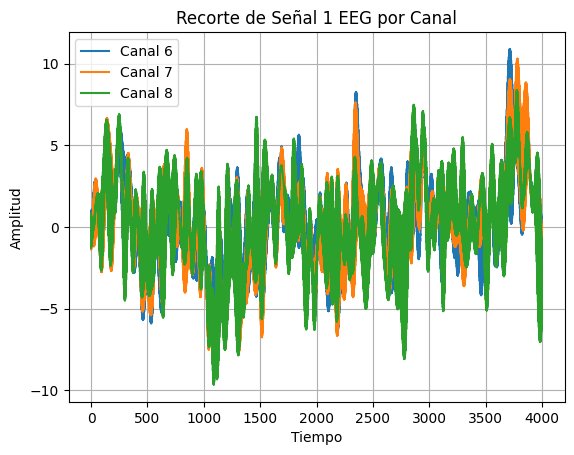


Estadísticas de los canales de la señal Señal 2:
            Media  Desviación estándar  Coeficiente de variación
Canal 0 -0.027044             4.135390               -152.913804
Canal 1 -0.026456             4.042824               -152.815654
Canal 2 -0.024473             3.834549               -156.685614

No hay canales con valores por encima de la media en todas las estadísticas.


C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


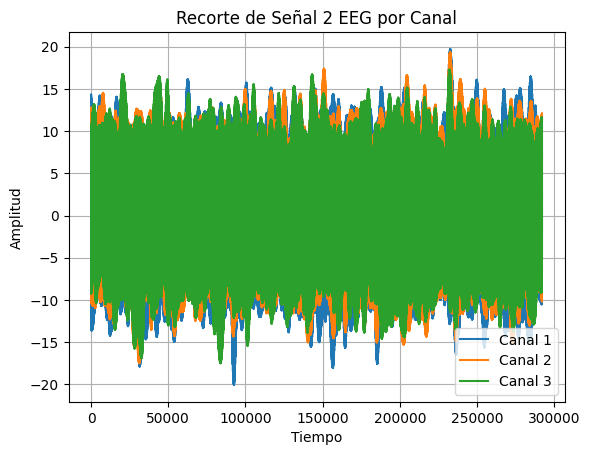


Estadísticas de los canales de la señal Señal 3:
            Media  Desviación estándar  Coeficiente de variación
Canal 0 -0.125707             1.779003                -14.151979
Canal 1 -0.015923             1.745129               -109.595580
Canal 2 -0.024160             2.046495                -84.706135
Canal 3  0.010572             2.021733                191.229595
Canal 4  0.061646             2.206859                 35.798661
Canal 5  0.051336             5.012068                 97.631810
Canal 6  0.171761             4.042994                 23.538458

Canales con valores por encima de la media en todas las estadísticas (Media, Desviación estándar, CV):
            Media  Desviación estándar  Coeficiente de variación
Canal 5  0.051336             5.012068                 97.631810
Canal 6  0.171761             4.042994                 23.538458


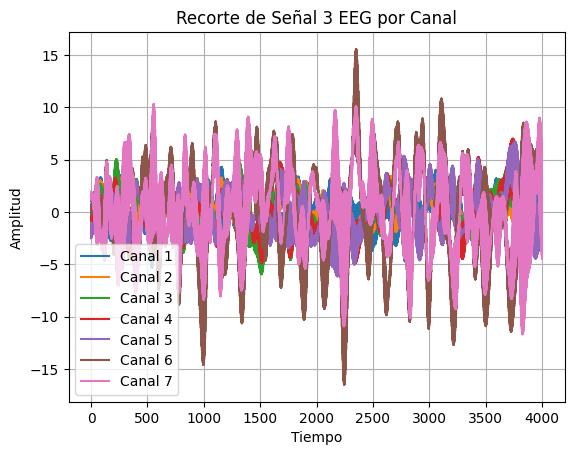

In [2]:
# Importando librerías
import scipy.io as sio  # Scipy para abrir los archivos .mat
from scipy.io import loadmat
import numpy as np  # Numpy: librería para trabajar con matrices y operaciones numéricas
import matplotlib.pyplot as plt  # Para graficar las señales
import pandas as pd  # Para trabajar con el DataFrame

# Clase para manejar información de señales EEG
class EEGSignal:
    """
    Clase para almacenar y procesar señales EEG.
    
    Atributos:
    - file_path: ruta del archivo que contiene los datos de EEG.
    - name: nombre de la señal.
    - data: matriz de datos EEG cargada desde el archivo.
    - original_data: copia de la señal original.
    - canales: número de canales de la señal.
    - tiempo: número de puntos de tiempo en la señal.
    - epochs: número de épocas de la señal.
    - recorte: porción recortada de la señal original.
    """

    def __init__(self, file_path, name):
        # Carga del archivo y preparación de los datos
        self.data = loadmat(file_path)['data']  # Carga el archivo y busca la clave 'data'
        self.name = name  # Nombre de la señal
        self.original_data = self.data.copy()  # Copia de la señal original
        self.canales, self.tiempo, self.epochs = self.data.shape  # Desempaquetamos dimensiones
        self.recorte = None  # Inicializamos la variable recorte

        # Inicialización de variables para tamaños y dimensiones
        self._tamaño_señal = self.data.size  # Tamaño de la señal original
        self._dimensiones_señal = self.data.shape  # Dimensión de la señal original
        self._tamaño_recorte = None  # Tamaño de la señal recortada
        self._dimensiones_recorte = None  # Dimensión del recorte

        # Inicialización de variables para el recorte
        self.canal_inicio_recorte = None  # Inicio del recorte del canal
        self.canal_fin_recorte = None  # Fin del recorte del canal
        self.epoca_inicio_recorte = None  # Inicio del recorte de la época
        self.epoca_fin_recorte = None  # Fin del recorte de la época

    def recortar(self, canal_inicio: int, canal_fin: int, epoca_inicio: int, epoca_fin: int):
        """
        Método para recortar la señal original por canal y época.
        
        Parámetros:
        - canal_inicio: índice del canal donde inicia el recorte.
        - canal_fin: índice del canal donde termina el recorte.
        - epoca_inicio: índice de la época donde inicia el recorte.
        - epoca_fin: índice de la época donde termina el recorte.
        """
        # Recorte de los datos
        self.recorte = self.data[canal_inicio:canal_fin, :, epoca_inicio:epoca_fin]  # Recorta según los parámetros
        self._dimensiones_recorte = self.recorte.shape  # Guardamos las dimensiones del recorte
        self._tamaño_recorte = self.recorte.size  # Guardamos el tamaño del recorte

        # Guardamos los límites del recorte
        self.canal_inicio_recorte = canal_inicio
        self.canal_fin_recorte = canal_fin
        self.epoca_inicio_recorte = epoca_inicio
        self.epoca_fin_recorte = epoca_fin

        # Cambiamos a dos dimensiones: (canales, tiempo * épocas)
        canales, tiempo, epocas = self.recorte.shape
        self.recorte = np.reshape(self.recorte, (canales, tiempo * epocas))
        #print(f"SHAPE DEL RECORTE: {self.recorte.shape}")  # Imprimimos las dimensiones del recorte

    def calcular_estadisticas(self):
        """
        Método para calcular y mostrar estadísticas de la señal recortada.
        Calcula la media, la desviación estándar y el coeficiente de variación (CV).
        Imprime los canales que tienen valores por encima de la media en todas las estadísticas.
        """
        # Calcular estadísticas
        media = np.mean(self.recorte, axis=1)  # Media por canal
        desviacion_std = np.std(self.recorte, axis=1)  # Desviación estándar por canal
        cv = desviacion_std / media  # Coeficiente de variación (CV)

        # Crear DataFrame con las estadísticas
        df_estadisticas = pd.DataFrame({
            'Media': media,
            'Desviación estándar': desviacion_std,
            'Coeficiente de variación': cv
        })

        # Asignar los números de los canales como índice
        df_estadisticas.index = [f"Canal {self.canal_inicio_recorte + i}" for i in range(self.canal_fin_recorte - self.canal_inicio_recorte)]

        # Imprimir el DataFrame de estadísticas
        print(f"\nEstadísticas de los canales de la señal {self.name}:")
        print(df_estadisticas.to_string())

        # Cálculo de la media de cada estadístico (por columna)
        medias_columnas = df_estadisticas.mean()

        # Filtrar canales que tienen valores por encima de la media en cada estadístico
        canales_por_encima_media = df_estadisticas[(df_estadisticas > medias_columnas).all(axis=1)]

        # Mostrar los canales que cumplen la condición
        if not canales_por_encima_media.empty:
            print("\nCanales con valores por encima de la media en todas las estadísticas (Media, Desviación estándar, CV):")
            print(canales_por_encima_media)
        else:
            print("\nNo hay canales con valores por encima de la media en todas las estadísticas.")

    def graficar_recorte(self):
        """
        Método para graficar el recorte de la señal EEG.
        Cada canal se grafica en función del tiempo unificado.
        """
        # Obtener el número de canales
        num_canales = self.recorte.shape[0]
        tiempo = np.arange(self.recorte.shape[1])  # Eje de tiempo (ahora tiempo * épocas)

        # Graficar cada canal
        for i in range(num_canales):
            plt.plot(tiempo, self.recorte[i, :], label=f'Canal {self.canal_inicio_recorte + i + 1}')  # Graficar cada canal

        plt.title(f"Recorte de {self.name} EEG por Canal")  # Título de la gráfica
        plt.xlabel("Tiempo")  # Etiqueta eje x
        plt.ylabel("Amplitud")  # Etiqueta eje y
        plt.legend()  # Muestra las etiquetas de los canales
        plt.grid()  # Agrega cuadrícula a la gráfica
        plt.show()  # Muestra la gráfica

# Cargar y utilizar los datos
señal1 = EEGSignal('S1.mat', "Señal 1")
señal1.recortar(5, 8, 4, 6)
señal1.calcular_estadisticas()
señal1.graficar_recorte()

señal2 = EEGSignal('S2.mat', "Señal 2")
señal2.recortar(0, 3, 4, 150)
señal2.calcular_estadisticas()
señal2.graficar_recorte()

señal3 = EEGSignal('S3.mat', "Señal 3")
señal3.recortar(0, 7, 4, 6)
señal3.calcular_estadisticas()
señal3.graficar_recorte()


In [6]:
!

ERROR: Invalid requirement: 'matplotlib,': Expected end or semicolon (after name and no valid version specifier)
    matplotlib,
              ^
